# Sentiment Analysis

## Index
<a/ id="index"><a/>

### [1. Summary of the project](#Summary)

### [2. Retrieving Python packages](#Pack)

### [3. Exploratory Analysis](#Explore)

> #### [3.1 Dataframe features](#Explore1)
> #### [3.2 Frequency tables](#Explore2)
> #### [3.3 Correlations](#Explore3)

### [4. Twitter Sentiment Analysis](#Twitter)
> #### [4.1 Some procesing functions](#Twitter1)
> #### [4.2 Emoticons](#Twitter2)
> #### [4.3 Sentiment Analysis each tweet](#Twitter3)
> #### [4.4 Merging scores with original dataset](#Twitter4)
> #### [4.5 Generating Confusion Matrix Prediction Sentiment vs Sentiment](#Twitter5)

### [5. Answers-Project Questions](#Answers)
>#### [5.1 When tweets are negative, what topics do travelers tend to discuss?](#A1)
>#### [5.2 When tweets are positive, what are travelers happy with?](#A2)
>#### [5.3 Outside of sentiment, what other systematic variation exists in the tweets about different airlines that you can deduce from the twitter feeds?](#A3)
>#### [5.4 What types of tweets on airlines tend to be retweeted?](#A4)
>#### [5.5 Who are the top 20 customers who are most negative (other way most frequently negative with high negative scores)?](#A5)
>#### [5.6 Who are the top 20 customers who are most positive (other way most frequently positive with high positive scores)?](#A6)

### [6. Bonus questions](#Bonus)
>#### [6.1 On average, how many airlines as customer tends to tweet about?](#B1)
>#### [6.2 Are positive or negative comments about a particular airline happen around a certain season e.g. summer, winter, thanksgiving, Christmas, etc.? How would you analyze that?](#B2)
>#### [6.3 Are there active customers who are tweeting and retweeting more frequently?](#B3)


## 1 Summary of the project
<a\ id="Summary"><a\>

The interactive index shows the structure of the project. 

Section1 is the summary of the project. 

Section2 retrieves the necessary packages for the project. 

In Section 3, I've done some exploratory analysis over the provided dataframe. 

In Section4, I've used Vader to generate the polarity qualifications for sentiment analysis (using the tweet feed). It includes different steps such as analyzing emoticons, merging dataframes, generating classification reports (for three and five categories), classifying airlines by sentiment polarity (Best polarity: VirginAmerica, worst polarity: USAirways) among others. 

Section 5 answer the questions for the project. 

> Q5.1) Relevant topics when there is a bad airline qualification: Flight cancellations, Delay in flights, Bad Service.

> Q5.2) Relevant topics when there is good airline qualification: Great Customer Service. Additionally, words as thanks and love are associated in this situation.

> Q5.3) Other systematic variations outside sentiment: I've analyzed reasons of negative qualifications, and "service issue" is something that customers tend to claim. The second important aspect is "flight delays". I've also analyzed possible recommendations for the airlines from customers. It seems that being adviced (delays or cancellations) is very important for customers.

> Q5.4) Types of tweets tend to be retweeted: The negative tweets tend to be retweeted.

> Q5.5) and Q5.6) Show the list of most negative and most positive customer qualifications.

Section6 answers the additional questions for the project.

> Q6.1) Customer by airlines tweets: I've generated comparative tables based in percentages over the text of each airline. The "cancellation issue" is more mentioned for American and Southwest. The "delay" word is more frequently used in Delta. On the other hand, "thanks" word is more used for Virgin America and Delta.

> Q6.2) Analysis of airlines and seasonality: I've generated a weekly analysis. It seems there is a slight discomfort in Sundays compared with the rest of the week. Tables and description are posted in the section.

> Q6.3) Customers retweeting: I've analyzed those customers that tend to generate more than one tweet. When the tweet is positive, the retweet tend to be more positive. On the contrary, when the tweet is negative the retweet tend to be even more negative.





## 2. Retrieving packages 
<a/ id="Pack"><a/>

#### [Index](#index)

In [1]:
#NATURAL LANGUAGE PROCESSING LIBRARIES NLTK
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.sem import relextract
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from nltk.sentiment.util import *

C:\Users\ronny\Anaconda2\envs\python3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
#ADDITIONAL NATURAL LANGUAGE PROCESSING LIBRARIES 
import sys
if "wordcloud" not in sys.modules:
    !pip install wordcloud

import unicodedata as ud
import wordcloud as wc

In [3]:
#OTHER LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from collections import Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 3. Exploratory Analysis
<a\ id="Explore"><a\>

#### [Index](#index)

### 3.1 Dataframe Features
<a\ id="Explore1"><a\>

In [4]:
tuiter=pd.read_csv("F:/PythonTraining/Python_CaseStudy/PCS_UTD_Twitter_Airlines/Tweets.csv")

In [5]:
tuiter.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,570301130888122000,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,570301083672813000,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)


In [6]:
tuiter.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
tuiter.shape

(14640, 15)

### 3.2 Frequency tables
<a\ id="Explore2"><a\>

In [8]:
#Airline sentiment
type_sentiment=tuiter.pivot_table(index="airline_sentiment", 
                                  values="tweet_id", aggfunc=len)
type_sentiment

,tweet_id
airline_sentiment,
negative,9178
neutral,3099
positive,2363


In [9]:
#Negative reason
neg_reason=tuiter.pivot_table(index="negativereason", 
                              values="tweet_id", aggfunc=len)
neg_reason

,tweet_id
negativereason,
Bad Flight,580
Can't Tell,1190
Cancelled Flight,847
Customer Service Issue,2910
Damaged Luggage,74
Flight Attendant Complaints,481
Flight Booking Problems,529
Late Flight,1665
Lost Luggage,724


In [10]:
#Airline
airline=tuiter.pivot_table(index="airline", 
                              values="tweet_id", aggfunc=len)
airline

,tweet_id
airline,
American,2759
Delta,2222
Southwest,2420
US Airways,2913
United,3822
Virgin America,504


In [11]:
#Tweet location
auxlugar=tuiter.pivot_table(index='tweet_location', 
                              values="tweet_id", aggfunc=len)
lugar=auxlugar.sort_values(by="tweet_id", ascending=False)
lugar.head(20)

,tweet_id
tweet_location,
"Boston, MA",157
"New York, NY",156
"Washington, DC",150
New York,127
USA,126
Chicago,104
New York City,96
"Los Angeles, CA",96
NYC,95


In [12]:
#Retweet count
aux_retuit=tuiter.pivot_table(index="retweet_count", values="tweet_id", 
                              aggfunc=len)
aux_retuit.head()

,tweet_id
retweet_count,
0,13873
1,640
2,66
3,22
4,17


### 3.3 Correlations
<a\ id="Explore3"><a\>

In [13]:
subtuiter=tuiter[["airline_sentiment",'airline_sentiment_confidence',
                 'negativereason', 'negativereason_confidence']]
#'airline', 'tweet_location' #Adding gives a big matrix

In [14]:
subtuiter2=pd.get_dummies(subtuiter)
subtuiter2.head()

,airline_sentiment_confidence,negativereason_confidence,airline_sentiment_negative,airline_sentiment_neutral,airline_sentiment_positive,negativereason_Bad Flight,negativereason_Can't Tell,negativereason_Cancelled Flight,negativereason_Customer Service Issue,negativereason_Damaged Luggage,negativereason_Flight Attendant Complaints,negativereason_Flight Booking Problems,negativereason_Late Flight,negativereason_Lost Luggage,negativereason_longlines
0,1.0000,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.3486,0.0000,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.6837,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0000,0.7033,1,0,0,1,0,0,0,0,0,0,0,0,0
4,1.0000,1.0000,1,0,0,0,1,0,0,0,0,0,0,0,0


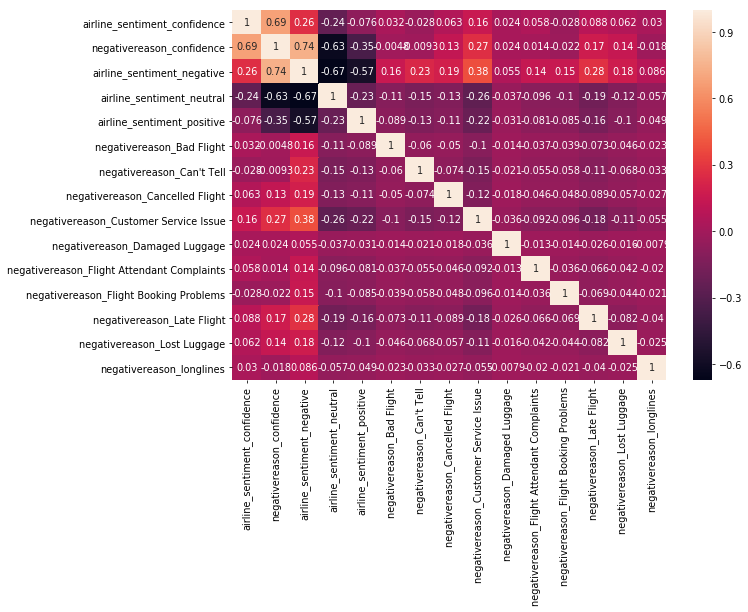

In [15]:
#The matrix of correlation
fig = plt.figure(figsize=(10,7), dpi=70)
sns.heatmap(subtuiter2.corr(), annot=True)

## 4. Tweet Sentiment Analysis
<a\ id="Twitter"><a\>

#### [Index](#index)

### 4.1 Some processing functions
<a\ id="Twitter1"><a\>

In [16]:
#Word tokenize, pos_tag, chunk
def chunkeado(a):
    chunkeado=ne_chunk(pos_tag(word_tokenize(a)))
    return chunkeado

In [17]:
#Removing stop words, punctuation, airlinenames, shortwords
stopwords_english=stopwords.words("english")
airlinenames=["@VirginAmerica", "@American", "@Delta", "@Southwest", "@US Airways", "@United",
             "USAirways", "AmericanAir", "SouthwestAir", "JetBlue", "united", "VirginAmerica"]
others=["I", "flight", "Flight", "flights", "http"]
def tokenlimpio(a):
    paso1_stopw=[i for i in word_tokenize(a) if i not in stopwords_english]
    paso2_punct=[i for i in paso1_stopw if i.isalpha()]
    paso3_airlines=[i for i in paso2_punct if i not in airlinenames]
    paso4_others=[i for i in paso3_airlines if i not in others]
    return paso4_others

In [18]:
#Defining a object for sentiment analysis
sentimiento=SentimentIntensityAnalyzer()

### 4.2 Working with emoticons
<a\ id="Twitter2"><a\>

In [19]:
#Finding emojis
def find_said(emoticon):
    return re.findall(u'[\U0001f300-\U0001f650]|[\u2000-\u3000]', emoticon)

In [20]:
tuiter["text2"]=tuiter["text"].apply(find_said) #To find emoticons
tuiter["text3"]=tuiter['text2'].apply(",".join) #To convert list into text


In [21]:
#Database of emoticons
tuiter_emoticons=tuiter.loc[tuiter["text3"]!=""]
tuiter_emoticons.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text2,text3
6,570300616901320000,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2/24/2015 11:13,San Francisco CA,Pacific Time (US & Canada),"[“, ”, ’]","“,”,’"
8,570299953286942000,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2/24/2015 11:11,San Diego,Pacific Time (US & Canada),[…],…
18,570270684619923000,positive,1.0000,NaN,NaN,Virgin America,NaN,thebrandiray,NaN,0,I ❤️ flying @VirginAmerica. ☺️👍,NaN,2/24/2015 9:15,Somewhere celebrating life.,Atlantic Time (Canada),"[❤, ☺, 👍]","❤,☺,👍"
24,570256553502068000,negative,1.0000,Customer Service Issue,0.3557,Virgin America,NaN,ayeevickiee,NaN,0,@VirginAmerica you guys messed up my seating.....,NaN,2/24/2015 8:18,714,Mountain Time (US & Canada),[😡],😡
30,570114021854212000,negative,1.0000,Flight Booking Problems,1.0000,Virgin America,NaN,jordanpichler,NaN,0,@VirginAmerica hi! I just bked a cool birthday...,NaN,2/23/2015 22:52,NaN,Vienna,[😢],😢


In [22]:
print("The number of rows with emoticons are: ", len(tuiter_emoticons))

The number of rows with emoticons are:  815


In [23]:
lista_emoti=[]
for i in tuiter.text2:
    auxdescrip=[ud.name(emoi) for emoi in i]
    descrip=",".join(map(str, auxdescrip))
    lista_emoti.append(descrip)
   

In [24]:
descr_emoti=pd.DataFrame(lista_emoti)
descr_emoti=descr_emoti.rename(columns={0:"emoti"})

In [25]:
tuiter=pd.merge(tuiter, descr_emoti, left_index=True, right_index=True)
tuiter.head(8)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text2,text3,emoti
0,570306133677760000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada),[],,
1,570301130888122000,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada),[],,
2,570301083672813000,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada),[],,
3,570301031407624000,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada),[],,
4,570300817074462000,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada),[],,
5,570300767074181000,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada),[],,
6,570300616901320000,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2/24/2015 11:13,San Francisco CA,Pacific Time (US & Canada),"[“, ”, ’]","“,”,’","LEFT DOUBLE QUOTATION MARK,RIGHT DOUBLE QUOTAT..."
7,570300248553349000,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2/24/2015 11:12,Los Angeles,Pacific Time (US & Canada),[],,


In [26]:
tuiter["text4"]=tuiter["text"]+","+tuiter["emoti"]

In [27]:
print("Text in column text(Original) is: ", tuiter.text.iloc[18])
print("Text in column text4(description emoticon is: ", tuiter.text4.iloc[18])

Text in column text(Original) is:  I ❤️ flying @VirginAmerica. ☺️👍
Text in column text4(description emoticon is:  I ❤️ flying @VirginAmerica. ☺️👍,HEAVY BLACK HEART,WHITE SMILING FACE,THUMBS UP SIGN


### 4.3 Sentiment analysis each tweet
<a\ id="Twitter3"><a\>

In [28]:
#Sentiment analysis with original text
calificaciones=[]
for i in tuiter["text"]:
    calificaciones.append(sentimiento.polarity_scores(i)) 

In [29]:
#Dataframe of sentiment analysis from original text
caldf=pd.DataFrame(calificaciones)
caldf.shape

(14640, 4)

In [30]:
#Sentiment analysis with text considering emoticons
calificaciones2=[]
for i in tuiter["text4"]:
    calificaciones2.append(sentimiento.polarity_scores(i))

In [31]:
#Dataframe of sentiment analysis considering emoticons
caldf2=pd.DataFrame(calificaciones2)
caldf2.head()

,compound,neg,neu,pos
0,0.0000,0.000,1.000,0.0
1,0.0000,0.000,1.000,0.0
2,0.0000,0.000,1.000,0.0
3,-0.5984,0.246,0.754,0.0
4,-0.5829,0.321,0.679,0.0


In [32]:
print("The text of line18 is", tuiter.text.iloc[18])
print("The qualification without emoticons is: ", caldf["compound"].iloc[18])
print("The text of line18 including emoticons in text is", tuiter.text4.iloc[18])
print("The qualification with emoticons is: ", caldf2["compound"].iloc[18])

The text of line18 is I ❤️ flying @VirginAmerica. ☺️👍
The qualification without emoticons is:  0.0
The text of line18 including emoticons in text is I ❤️ flying @VirginAmerica. ☺️👍,HEAVY BLACK HEART,WHITE SMILING FACE,THUMBS UP SIGN
The qualification with emoticons is:  0.5766


##### COMMENT 4.3: 
It is better to include description of emoticons because it gives a better qualification of the customer sentiment. Even so, we could see in section 4.1 that emoticons were used just in just 815 of 14640 customer comments. It ony represents 5.56% of all dataframe.

### 4.4 Merging scores with original dataset
<a\ id="Twitter4"><a\>

In [33]:
tuiter2=pd.merge(tuiter, caldf2, left_index=True, right_index=True)
tuiter2.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'text2', 'text3', 'emoti', 'text4',
       'compound', 'neg', 'neu', 'pos'],
      dtype='object')

In [34]:
tuiter2.head(7)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_location,user_timezone,text2,text3,emoti,text4,compound,neg,neu,pos
0,570306133677760000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,NaN,Eastern Time (US & Canada),[],,,"@VirginAmerica What @dhepburn said.,",0.0000,0.000,1.000,0.000
1,570301130888122000,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),[],,,@VirginAmerica plus you've added commercials t...,0.0000,0.000,1.000,0.000
2,570301083672813000,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,Lets Play,Central Time (US & Canada),[],,,@VirginAmerica I didn't today... Must mean I n...,0.0000,0.000,1.000,0.000
3,570301031407624000,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),[],,,@VirginAmerica it's really aggressive to blast...,-0.5984,0.246,0.754,0.000
4,570300817074462000,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),[],,,@VirginAmerica and it's a really big bad thing...,-0.5829,0.321,0.679,0.000
5,570300767074181000,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),[],,,@VirginAmerica seriously would pay $30 a fligh...,-0.5945,0.256,0.670,0.074
6,570300616901320000,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,...,San Francisco CA,Pacific Time (US & Canada),"[“, ”, ’]","“,”,’","LEFT DOUBLE QUOTATION MARK,RIGHT DOUBLE QUOTAT...","@VirginAmerica yes, nearly every time I fly VX...",0.4019,0.000,0.891,0.109


In [35]:
tuiter2["chosen"] = tuiter2[["neg", "neu", "pos"]].max(axis=1)
tuiter2["pred_sentiment"]=""
tuiter2["pred_sentiment2"]=""

In [36]:
#To recognize the value of compund
tuiter2["polarity"]=pd.to_numeric(tuiter2["compound"], errors="coerce")

#### 4.4.1 Three sentiment categories based in polarity

In [37]:
tuiter2.loc[tuiter2.polarity>0,'pred_sentiment']='positive'
tuiter2.loc[tuiter2.polarity==0,'pred_sentiment']='neutral'
tuiter2.loc[tuiter2.polarity<0,'pred_sentiment']='negative'

#### 4.4.2 Five sentiment categories based in polarity

In [38]:
tuiter2.loc[tuiter2.polarity>0.5,'pred_sentiment2']='verypositive'
tuiter2.loc[(tuiter2.polarity>0) & (tuiter2.polarity<=0.5), "pred_sentiment2"]="positive"
tuiter2.loc[tuiter2.polarity==0,'pred_sentiment2']='neutral'
tuiter2.loc[(tuiter2.polarity<0) & (tuiter2.polarity>=-0.5), "pred_sentiment2"]="negative"
tuiter2.loc[tuiter2.polarity<-0.5,'pred_sentiment2']='verynegative'

#### 4.4.3 Summary table

In [39]:
subtuiter2=tuiter2[["tweet_id", "name", 'airline_sentiment','neg',
                   'neu', 'pos', "polarity", "pred_sentiment", "pred_sentiment2", "text", "airline"]]

In [40]:
subtuiter2.head()

,tweet_id,name,airline_sentiment,neg,neu,pos,polarity,pred_sentiment,pred_sentiment2,text,airline
0,570306133677760000,cairdin,neutral,0.000,1.000,0.0,0.0000,neutral,neutral,@VirginAmerica What @dhepburn said.,Virgin America
1,570301130888122000,jnardino,positive,0.000,1.000,0.0,0.0000,neutral,neutral,@VirginAmerica plus you've added commercials t...,Virgin America
2,570301083672813000,yvonnalynn,neutral,0.000,1.000,0.0,0.0000,neutral,neutral,@VirginAmerica I didn't today... Must mean I n...,Virgin America
3,570301031407624000,jnardino,negative,0.246,0.754,0.0,-0.5984,negative,verynegative,@VirginAmerica it's really aggressive to blast...,Virgin America
4,570300817074462000,jnardino,negative,0.321,0.679,0.0,-0.5829,negative,verynegative,@VirginAmerica and it's a really big bad thing...,Virgin America


### 4.5 Generating Confusion Matrix: Prediction Sentiment vs Sentiment
<a\ id="Twitter5"><a\>

#### 4.5.1 Confusion Matrix 3 categories

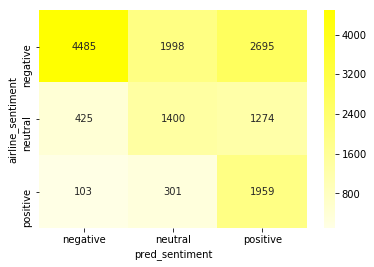

In [41]:
clasif_3cat=subtuiter2.pivot_table(index="airline_sentiment", columns="pred_sentiment", 
                       values="tweet_id", aggfunc=len)
pal = sns.light_palette("yellow", as_cmap=True)
sns.heatmap(clasif_3cat, annot=True, fmt="d", cmap=pal)

In [42]:
print(classification_report(subtuiter2.airline_sentiment, subtuiter2.pred_sentiment))

             precision    recall  f1-score   support

   negative       0.89      0.49      0.63      9178
    neutral       0.38      0.45      0.41      3099
   positive       0.33      0.83      0.47      2363

avg / total       0.69      0.54      0.56     14640



#### Comment 4.5.1 
Precision-recall table shows a high precision for negative classification but low precision for positive classification. At the same time, the table shows a high recall for positive classification and a low recall for negative classification. The results suggest that we have to be careful in our conclusiones since there is no a very high power of prediction.

#### 4.5.2 Comparison 5 categories of sentiment

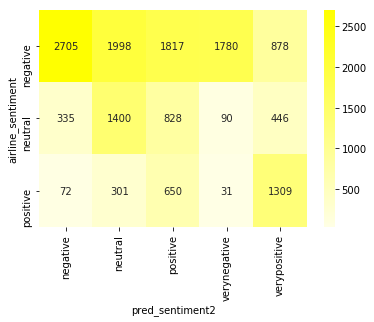

In [43]:
clasif_5cat=subtuiter2.pivot_table(index="airline_sentiment", columns="pred_sentiment2", 
                       values="tweet_id", aggfunc=len)
pal = sns.light_palette("yellow", as_cmap=True)
sns.heatmap(clasif_5cat, annot=True, fmt="d", cmap=pal)

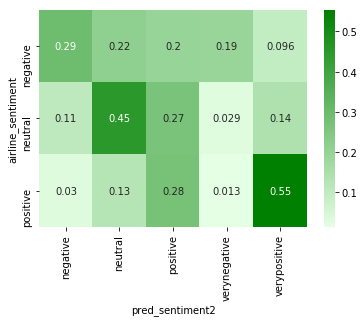

In [44]:
clasif_5cat_per=clasif_5cat.div(clasif_5cat.sum(axis=1), axis=0 )
pal = sns.light_palette("green", as_cmap=True)
sns.heatmap(clasif_5cat_per, annot=True, cmap=pal)

#### Comment 4.5.2:

The analysis with 5 categories shows an interesting pattern. When the airline was classified as negative a high proportion (29%) tends to be classified as very negative. Furthermore, when the airline classification is positive a higher proportion 55% tend to be classified as positive. It suggest that the classification for the customers in each airline should be 5 categories instead of 3.



### 4.6 Average sentiment by airline

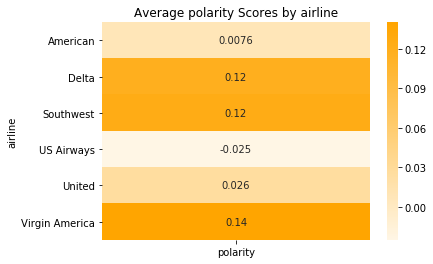

In [45]:
tableairline1=subtuiter2.pivot_table(index="airline", values="polarity", aggfunc=np.mean)
pal = sns.light_palette("orange", as_cmap=True)
plt.title("Average polarity Scores by airline")
sns.heatmap(tableairline1, annot=True, cmap=pal)

In [46]:
tableairline2=subtuiter2.pivot_table(index="airline", columns="pred_sentiment2", 
                                     values="polarity", aggfunc=len)
tableairline2

pred_sentiment2,negative,neutral,positive,verynegative,verypositive
airline,,,,,
American,650.0,619.0,645.0,418.0,427.0
Delta,382.0,679.0,458.0,203.0,500.0
Southwest,406.0,635.0,545.0,251.0,583.0
US Airways,712.0,707.0,653.0,466.0,375.0
United,880.0,891.0,899.0,525.0,627.0
Virgin America,82.0,168.0,95.0,38.0,121.0


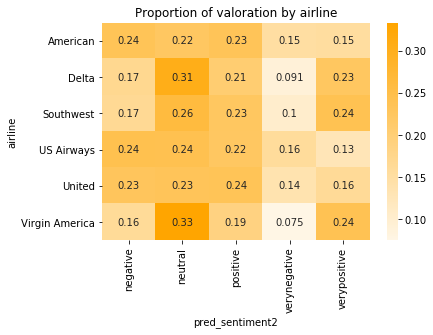

In [47]:
tableairline2_per = tableairline2.div(tableairline2.sum(axis=1), axis=0 )

pal = sns.light_palette("orange", as_cmap=True)
plt.title("Proportion of valoration by airline")
sns.heatmap(tableairline2_per, annot=True, cmap=pal)


#### Comment 4.6:
The airline with better sentiment polarity is VirginAmerica. On the other hand the airline with the worst qualification is USAirways.

## 5. Questions
<a\ id="Answers"><a\>

### 5.1 When tweets are negative, what topics do travelers tend to discuss?
<a\ id="A1"><a\>

#### Answer 5.1
I've used the information considering the column "airline sentiment" when it is classified as negative. Then, I've applyed two type of analysis: 

1) I've analyzed the frequency of common words when tweets are negative (after creating a bag of words where I've filtered stop words, punctuation and airline names). Common relevant topics were: Flight cancellations, Delay in flights, Bad Service.

2) I've created a wordcloud without filters to check what words are more repeated. According this graph, the higher proportion of negative comments come from United, UsAirways and American. It's important to mention that flight, time  and customer service are mentioned recurrently.

#### [Index](#index)

In [48]:
#Filtering the negative tweets
tuiter_negative=tuiter[tuiter["airline_sentiment"]=="negative"]

In [49]:
print("All tweets: ", tuiter.shape)
print("Just negative tweets: ", tuiter_negative.shape)

All tweets:  (14640, 19)
Just negative tweets:  (9178, 19)


#### 5.1.1 Using all text from negative classification

In [50]:
allneg_text='.'.join(tuiter_negative.text)
type(allneg_text)

str

#### 5.1.2 Processing the text

In [51]:
topicfreq_neg=tokenlimpio(allneg_text)

In [52]:
#Counting words with FreqDist
cont_neg=nltk.FreqDist(topicfreq_neg)
type(cont_neg)

nltk.probability.FreqDist

#### 5.1.3 Table and graph most frequent words in negative evaluations

In [53]:
cont_neg2=dict(cont_neg)

In [54]:
table_neg=pd.DataFrame.from_dict(cont_neg2, orient="index")
table_neg=table_neg.rename(columns={0:"Freq"})
table_neg=table_neg.sort_values(by="Freq", ascending=False)

In [55]:
table_neg_top20=table_neg.iloc[0:20,:]
table_neg_top20

,Freq
get,949
Cancelled,920
service,683
hours,608
hold,596
customer,559
time,541
amp,503
plane,493
help,470


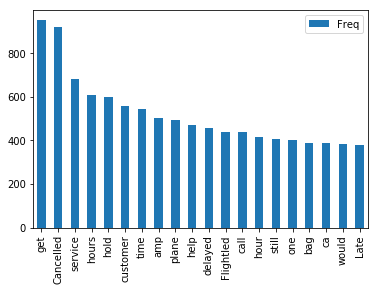

In [56]:
table_neg_top20.plot.bar()

#### 5.1.4 Word cloud in negative evaluations

In [57]:
nube_neg=wc.WordCloud(max_words=100, 
                  background_color="black").generate(allneg_text)

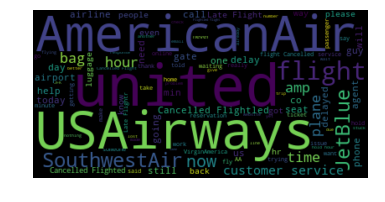

In [58]:
plt.imshow(nube_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

### 5.2 When tweets are positive, what are travelers happy with?
<a\ id="A2"><a\>

#### Answer 5.2
I've used the information considering the column "airline sentiment" (same as section 5.1) when it is classified as positive. Then, I've applyed two type of analysis: 

1) Common relevant topics were: Great Customer Service. It important to mention that the words thank, love is repeated that could be associated from gratitude for the service.

2) In the wordcloud the major proportion of positive twwts comes from JetBlue, SouthWestAir.

#### [Index](#index)

In [59]:
#Filtering the positive tweets
tuiter_positive=tuiter[tuiter["airline_sentiment"]=="positive"]

In [60]:
print("All tweets: ", tuiter.shape)
print("Just positive tweets: ", tuiter_positive.shape)

All tweets:  (14640, 19)
Just positive tweets:  (2363, 19)


#### 5.2.1 Using all text from positive classification

In [61]:
allpos_text=".".join(tuiter_positive.text)

#### 5.2.2 Processing the text

In [62]:
topicfreq_pos=tokenlimpio(allpos_text)

In [63]:
#Counting words with FreqDist
cont_pos=nltk.FreqDist(topicfreq_pos)
type(cont_pos)

nltk.probability.FreqDist

#### 5.2.3 Table and graph most frequent words in positive evaluations

In [64]:
cont_pos2=dict(cont_pos)

In [65]:
table_pos=pd.DataFrame.from_dict(cont_pos2, orient="index")
table_pos=table_pos.rename(columns={0:"Freq"})
table_pos=table_pos.sort_values(by="Freq", ascending=False)

In [66]:
table_pos_top20=table_pos.iloc[0:20,:]
table_pos_top20

,Freq
thanks,311
Thanks,267
Thank,223
thank,204
great,174
service,152
get,112
customer,104
guys,100
much,93


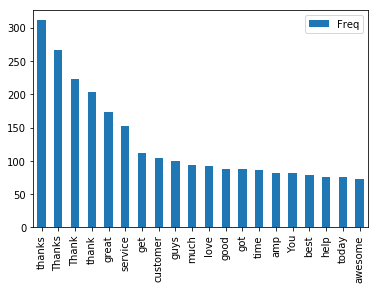

In [67]:
table_pos_top20.plot.bar()

#### 5.1.4 Word cloud in positive evaluations

In [68]:
nube_pos=wc.WordCloud(max_words=100, 
                  background_color="white").generate(allpos_text)

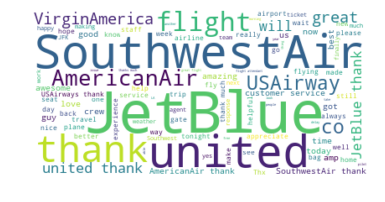

In [69]:
plt.imshow(nube_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

### 5.3 Outside of sentiment, what other systematic variation exists in the tweets about different airlines that you can deduce from the twitter feeds?

<a\ id="A3"><a\>

#### Answer 5.3
I've found the following patterns in the tweets (outside of sentiment):

1) Focusing in negative reasons, I've found that service issue is something that customers tend to claim. The second important aspect is flight delays. Those aspects are very similar from the analysis of bag of words in section1.

2) I've analyzed the modifiers "must" and "should" to check if there is any pattern such as recommendations to the airlines. While I was expecting more clear patterns, there weren't. Even so, I could find many lines with useful advices for airlines or customers such as being adviced, check wether conditions among others.

#### [Index](#index)

#### 5.3.1 Table of frequencies negative reasons from a customer


In [70]:
#Airline
airline_negativereason=tuiter.pivot_table(index="airline", columns="negativereason", 
                              values="tweet_id",  aggfunc=len)


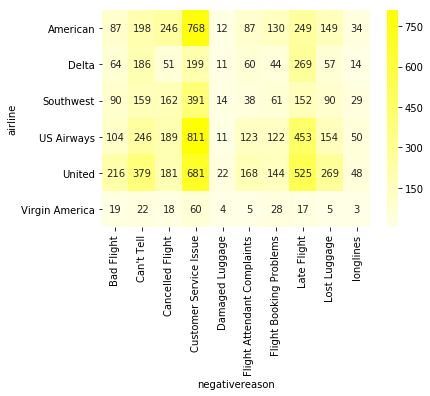

In [71]:
pal2 = sns.light_palette("yellow", as_cmap=True)
sns.heatmap(airline_negativereason, annot=True, fmt="d", cmap=pal2)

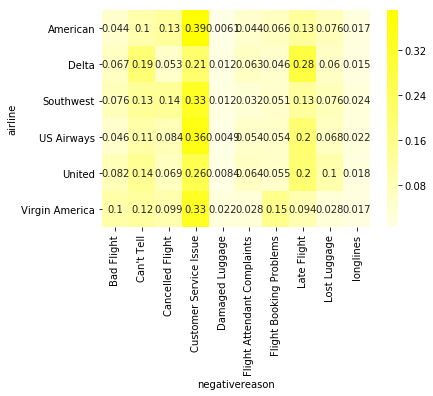

In [72]:
airline_negativereason_per = airline_negativereason.div(airline_negativereason.sum(axis=1), axis=0 )

pal3 = sns.light_palette("yellow", as_cmap=True)
sns.heatmap(airline_negativereason_per, annot=True, cmap=pal2)


From the combination of Negative Reason and Airline we can identify some patterns such as the major issue for all airlines is Customer Service. There is an exception with Delta which main reason isLate flights 

#### 5.3.2 Analysis of "must" and "should" as advice for airlines or passengers

In [73]:
all_text=".".join(tuiter.text)

In [74]:
all_text_token=all_text.split(" ")

In [75]:
listamust=[]
try:
    for i,j in enumerate(all_text_token):
        if j=="must" in all_text_token:
            z="must", all_text_token[i+1], all_text_token[i+2], all_text_token[i+3], all_text_token[i+4], all_text_token[i+5], all_text_token[i+6], all_text_token[i+7]
            listamust.append(z)
except:
    print("this word is used in the text", len(listamust))

In [76]:
listamust

[('must', 'a', 'traveler', 'miss', 'a', 'flight', 'to', 'Late'),
 ('must', 'be', 'investigated.', 'My', "baggage's", 'lost', 'and', "there's"),
 ('must', 'be', 'a', 'drone', '“@united:', '@KeamBleam', 'We', 'understand'),
 ('must', 'be', 'something', 'you', 'can', 'do.@united', 'there', 'is'),
 ('must', 'follow', 'me', 'in', 'order', 'for', 'me', 'to'),
 ('must', 'be', '100', 'people', 'waiting', 'in', 'line', 'for'),
 ('must', 'check', 'this', 'issue.', 'UA', '1514', 'EWR', 'to'),
 ('must', 'it', 'be', 'done', 'at', 'Schiphol?.@united', 'how', 'do'),
 ('must', 'stop', 'my', 'relationship', 'with', 'you.', "You've", 'become'),
 ('must', 'always', 'be', 'also', 'presented.', 'Read', 'it.@united', 'We'),
 ('must', 'advise', 'at', 'the', 'time', 'of', 'purchase.', ''),
 ('must', 'the', '4:45pm', 'nonstop', 'BOS-BNA', 'flight', 'stop', 'running'),
 ('must', 'a', 'guest', 'be', 'for', 'u', 'to', 'require'),
 ('must', 'being', 'playing', 'a', 'game', 'called', 'Who', 'can'),
 ('must', 'have'

In [77]:
listamust_string= ','.join(str(v) for v in listamust)

In [78]:
listashould=[]
try:
    for i,j in enumerate(all_text_token):
        if j=="should" in all_text_token:
            z="should", all_text_token[i+1], all_text_token[i+2], all_text_token[i+3], all_text_token[i+4], all_text_token[i+5], all_text_token[i+6], all_text_token[i+7]
            listashould.append(z)
except:
    print("this word is used in the text", len(listashould))

In [79]:
listashould

[('should',
  'be',
  'like',
  'this..@VirginAmerica',
  'awesome.',
  'I',
  'flew',
  'yall'),
 ('should', 'of', 'been', 'here.', 'Your', 'no', 'Late', 'Flight'),
 ('should', 'I', 'be', 'concerned', 'that', 'I', 'am', 'about'),
 ('should',
  'mention',
  'that',
  'on',
  'your',
  'website',
  '#soreback.@VirginAmerica',
  'flight'),
 ('should', 'try', 'it.', 'Just', 'go', 'most', 'of', 'the'),
 ('should',
  'know',
  'that.',
  ':).@VirginAmerica',
  'when',
  'are',
  'you',
  'flying'),
 ('should',
  'have',
  '39',
  'dollar',
  'LAX-Las',
  'fares!!!.@VirginAmerica',
  'great.',
  'Well'),
 ('should',
  'know.',
  'All',
  'best..@VirginAmerica',
  'You',
  'should',
  'still',
  'develop'),
 ('should', 'still', 'develop', 'an', 'app', '-', 'then', 'you'),
 ('should', 'Austin', 'be', 'the', 'only', 'one', 'getting', 'nerd'),
 ('should', 'use', 'this', 'in', 'their', 'next', 'airline', 'commercial'),
 ('should', 'contact', '(or', 'contact', 'me)', 'to', 'get', 'a'),
 ('should',

### 5.4 What types of tweets on airlines tend to be retweeted?
<a\ id="A4"><a\>


#### Answer 5.4
According to the frequency analysis is most probable that negative tweets tend to be retweeted. For example, the negative classification increase in one retweet (from 61.85% first tweet to 81.87% second tweet). Even so, this is not a clear pattern becaue with three, four, or more retweets the median is around 60%.

#### [Index](#index)

In [80]:
aux_retuit=tuiter.pivot_table(index="retweet_count", values="tweet_id", 
                              columns="airline_sentiment", aggfunc=len)
aux_retuit2=aux_retuit.fillna(0)


In [81]:
aux_retuit2["total"]=aux_retuit2["negative"]+aux_retuit2["neutral"]+aux_retuit2["positive"]
aux_retuit2["per_neg"]=aux_retuit2["negative"]/aux_retuit2["total"]
aux_retuit2["per_pos"]=aux_retuit2["positive"]/aux_retuit2["total"]
aux_retuit2["per_neutral"]=aux_retuit2["neutral"]/aux_retuit2["total"]

In [82]:
aux_retuit2

airline_sentiment,negative,neutral,positive,total,per_neg,per_pos,per_neutral
retweet_count,,,,,,,
0,8581.0,3005.0,2287.0,13873.0,0.618540,0.164853,0.216608
1,524.0,63.0,53.0,640.0,0.818750,0.082812,0.098437
2,41.0,16.0,9.0,66.0,0.621212,0.136364,0.242424
3,12.0,7.0,3.0,22.0,0.545455,0.136364,0.318182
4,11.0,2.0,4.0,17.0,0.647059,0.235294,0.117647
5,2.0,2.0,1.0,5.0,0.400000,0.200000,0.400000
6,0.0,2.0,1.0,3.0,0.000000,0.333333,0.666667
7,2.0,0.0,1.0,3.0,0.666667,0.333333,0.000000
8,0.0,0.0,1.0,1.0,0.000000,1.000000,0.000000


### 5.5 Who are the top 20 customers who are most negative (other way most frequently negative with high negative scores)?

<a\ id="A5"><a\>

#### Answer 5.5
Lines below we can observe a list with the most negative sentiments according the sentiment analysis (column sentiment). In the top20 most negative 18 are correctly classified (90%) and there are two customers whose airline sentiment is classified as neutral instead of negative.

I've also created a word cloud were we can associate with bad service and delays.

#### [Index](#index)

In [83]:
top20_mostneg_polarity=subtuiter2.sort_values(by="polarity").iloc[0:20,:]
top20_mostneg_polarity2=top20_mostneg_polarity[["name", "airline_sentiment", "pred_sentiment2", "polarity"]]
top20_mostneg_polarity2

,name,airline_sentiment,pred_sentiment2,polarity
5266,SLCVeganista,neutral,verynegative,-0.9854
1214,jacob_bach,negative,verynegative,-0.9735
7105,AngBeTweetin,neutral,verynegative,-0.9690
2436,AngelikaGiatras,negative,verynegative,-0.9502
1374,czamkoff,negative,verynegative,-0.9501
3135,DominikDesbois,negative,verynegative,-0.9440
2931,MR_G_LISTER,negative,verynegative,-0.9400
9695,MeganStephens74,negative,verynegative,-0.9339
11052,teitelbaum_jami,negative,verynegative,-0.9304
1197,tinsleyjim,negative,verynegative,-0.9302


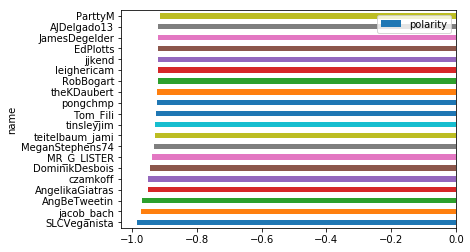

In [84]:
top20_mostneg_polarity2.plot.barh(x="name", y="polarity")

#### 5.5.1 Top20 Wordcloud "Negative polarity" report

In [85]:
top20_mostneg_all=".".join(top20_mostneg_polarity.text)

In [86]:
nube_neg=wc.WordCloud(max_words=100, 
                  background_color="black").generate(top20_mostneg_all)

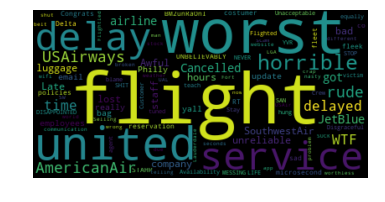

In [87]:
plt.imshow(nube_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

### 5.6 Who are the top 20 customers who are most positive (other way most frequently positive with high positive scores)?

<a\ id="A6"><a\>


#### Answer 5.6
Lines below we can observe a list with the most positive sentiments according the sentiment analysis (column sentiment). In the top20 most positive 15 are correctly classified (75%). 

I've also created a word cloud were we can associate with words such as great, thanks and love.

#### [Index](#index)

In [88]:
top20_mostpos_polarity=subtuiter2.sort_values(by="polarity", ascending=False).iloc[0:20,:]
top20_mostpos_polarity2=top20_mostpos_polarity[["name", "airline_sentiment", "pred_sentiment2", "polarity"]]
top20_mostpos_polarity2

,name,airline_sentiment,pred_sentiment2,polarity
8851,vincenzolandino,neutral,verypositive,0.9749
13472,polpastor21,positive,verypositive,0.9747
4511,The_Playmaker20,positive,verypositive,0.9700
7224,michael_moonn,positive,verypositive,0.9697
12593,The_Playmaker20,positive,verypositive,0.9632
12752,unadesmemoriada,positive,verypositive,0.9611
5952,X713,positive,verypositive,0.9590
8922,iSocialFanz,positive,verypositive,0.9583
7677,MrDaftPrawn,positive,verypositive,0.9567
6144,livvyports16,neutral,verypositive,0.9545


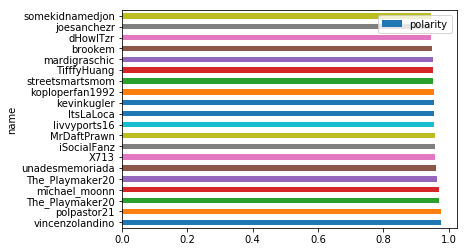

In [89]:
top20_mostpos_polarity2.plot.barh(x="name", y="polarity")

#### 5.6.1 Top20 Wordcloud "positive polarity" report

In [90]:
top20_mostpos_all=".".join(top20_mostpos_polarity.text)

In [91]:
nube_pos=wc.WordCloud(max_words=100, 
                  background_color="white").generate(top20_mostpos_all)

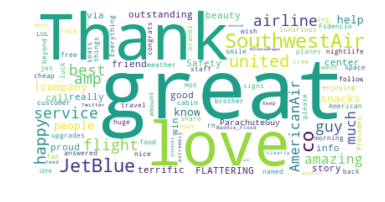

In [92]:
plt.imshow(nube_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

## 6. Bonus questions

### 6.1 On average, how many airlines as customer tends to tweet about?
<a\ id="B1"><a\>


#### Answer 6.1
In this section, I've analyzed the tweets by airline. Firstly, I've divided in six datasets which represent the information of each airline. Then, I've analyzed the specific text of the airline considering the frequency of words. To make feasible a comparison, I've used the proportion of a word that is used in the airline. Later, I've join all these proportions with the most recurrent words by airline. Finally, I've created a heatmap table where we can compare what words inside the tweets are more frequent by airline.

The table gives interesting insights. The cancellation issue is more mentioned for American and Southwest. The delay words is more frequently used in Delta. On the other hand, thanks words is more used for Virgin America and Delta.


#### [Index](#index)

In [93]:
tuiter_virgin=tuiter2[tuiter2.airline=="Virgin America"]
tuiter_united=tuiter2[tuiter2.airline=="United"]
tuiter_southwest=tuiter2[tuiter2.airline=="Southwest"]
tuiter_delta=tuiter2[tuiter2.airline=="Delta"]
tuiter_usair=tuiter2[tuiter2.airline=="US Airways"]
tuiter_american=tuiter2[tuiter2.airline=="American"]


In [94]:
#Finding the most significative words for Virgin American (Percentake of total words)
tuiter_virgin_text=".".join(tuiter_virgin.text)
tuiter_virgin_token=tokenlimpio(tuiter_virgin_text)
count_virgintoken=nltk.FreqDist(tuiter_virgin_token)
count_virgintoken2=dict(count_virgintoken)
table_virgintoken=pd.DataFrame.from_dict(count_virgintoken2, orient="index")
table_virgintoken=table_virgintoken.rename(columns={0:"Freq"})
table_virgintoken=table_virgintoken.sort_values(by="Freq", ascending=False)
table_virgintoken2=table_virgintoken[table_virgintoken.Freq>3]
table_virgintoken2["per_virgin"]=table_virgintoken2.Freq/table_virgintoken2.Freq.sum()
table_virgintoken3=table_virgintoken2[table_virgintoken2["per_virgin"]>0.01]
table_virgintoken3


,Freq,per_virgin
guys,23,0.012189
website,22,0.011659
help,22,0.011659
Cancelled,22,0.011659
flying,21,0.011129
fly,20,0.010599
love,19,0.010069
seat,19,0.010069
amp,19,0.010069
virginamerica,19,0.010069


In [95]:
#Finding the most significative words for United (Percentake of total words)
tuiter_united_text=".".join(tuiter_united.text)
tuiter_united_token=tokenlimpio(tuiter_united_text)
count_unitedtoken=nltk.FreqDist(tuiter_united_token)
count_unitedtoken2=dict(count_unitedtoken)
table_unitedtoken=pd.DataFrame.from_dict(count_unitedtoken2, orient="index")
table_unitedtoken=table_unitedtoken.rename(columns={0:"Freq"})
table_unitedtoken=table_unitedtoken.sort_values(by="Freq", ascending=False)
table_unitedtoken2=table_unitedtoken[table_unitedtoken.Freq>25]
table_unitedtoken2["per_united"]=table_unitedtoken2.Freq/table_unitedtoken2.Freq.sum()
table_unitedtoken3=table_unitedtoken2[table_unitedtoken2["per_united"]>0.01]
table_unitedtoken3.head()

,Freq,per_united
get,318,0.020102
United,305,0.019281
service,260,0.016436
time,212,0.013402
customer,199,0.012580


In [96]:
#Finding the most significative words for Southwest (Percentake of total words)
tuiter_southwest_text=".".join(tuiter_southwest.text)
tuiter_southwest_token=tokenlimpio(tuiter_southwest_text)
count_southwesttoken=nltk.FreqDist(tuiter_southwest_token)
count_southwesttoken2=dict(count_southwesttoken)
table_southwesttoken=pd.DataFrame.from_dict(count_southwesttoken2, orient="index")
table_southwesttoken=table_southwesttoken.rename(columns={0:"Freq"})
table_southwesttoken=table_southwesttoken.sort_values(by="Freq", ascending=False)
table_southwesttoken2=table_southwesttoken[table_southwesttoken.Freq>25]
table_southwesttoken2["per_southwest"]=table_southwesttoken2.Freq/table_southwesttoken2.Freq.sum()
table_southwesttoken3=table_southwesttoken2[table_southwesttoken2["per_southwest"]>0.01]
table_southwesttoken3

,Freq,per_southwest
Cancelled,242,0.034483
get,228,0.032488
hold,155,0.022086
service,126,0.017954
help,120,0.017099
time,116,0.016529
customer,112,0.015959
Flightled,111,0.015816
Thanks,102,0.014534
amp,102,0.014534


In [97]:
#Finding the most significative words for Delta (Percentake of total words)
tuiter_delta_text=".".join(tuiter_delta.text)
tuiter_delta_token=tokenlimpio(tuiter_delta_text)
count_deltatoken=nltk.FreqDist(tuiter_delta_token)
count_deltatoken2=dict(count_deltatoken)
table_deltatoken=pd.DataFrame.from_dict(count_deltatoken2, orient="index")
table_deltatoken=table_deltatoken.rename(columns={0:"Freq"})
table_deltatoken=table_deltatoken.sort_values(by="Freq", ascending=False)
table_deltatoken2=table_deltatoken[table_deltatoken.Freq>25]
table_deltatoken2["per_delta"]=table_deltatoken2.Freq/table_deltatoken2.Freq.sum()
table_deltatoken3=table_deltatoken2[table_deltatoken2["per_delta"]>0.01]
table_deltatoken3

,Freq,per_delta
fleek,150,0.029797
Our,149,0.029599
fleet,146,0.029003
get,123,0.024434
thanks,101,0.020064
time,95,0.018872
JFK,92,0.018276
jetblue,89,0.017680
amp,87,0.017282
plane,80,0.015892


In [98]:
#Finding the most significative words for USAirways (Percentake of total words)
tuiter_usair_text=".".join(tuiter_usair.text)
tuiter_usair_token=tokenlimpio(tuiter_usair_text)
count_usairtoken=nltk.FreqDist(tuiter_usair_token)
count_usairtoken2=dict(count_usairtoken)
table_usairtoken=pd.DataFrame.from_dict(count_usairtoken2, orient="index")
table_usairtoken=table_usairtoken.rename(columns={0:"Freq"})
table_usairtoken=table_usairtoken.sort_values(by="Freq", ascending=False)
table_usairtoken2=table_usairtoken[table_usairtoken.Freq>25]
table_usairtoken2["per_usair"]=table_usairtoken2.Freq/table_usairtoken2.Freq.sum()
table_usairtoken3=table_usairtoken2[table_usairtoken2["per_usair"]>0.01]
table_usairtoken3

,Freq,per_usair
get,300,0.024886
hold,271,0.022480
service,224,0.018582
Cancelled,214,0.017752
hours,185,0.015346
help,174,0.014434
customer,171,0.014185
amp,169,0.014019
plane,157,0.013024
time,153,0.012692


In [99]:
#Finding the most significative words for American (Percentake of total words)
tuiter_american_text=".".join(tuiter_american.text)
tuiter_american_token=tokenlimpio(tuiter_american_text)
count_americantoken=nltk.FreqDist(tuiter_american_token)
count_americantoken2=dict(count_americantoken)
table_americantoken=pd.DataFrame.from_dict(count_americantoken2, orient="index")
table_americantoken=table_americantoken.rename(columns={0:"Freq"})
table_americantoken=table_americantoken.sort_values(by="Freq", ascending=False)
table_americantoken2=table_americantoken[table_americantoken.Freq>25]
table_americantoken2["per_american"]=table_americantoken2.Freq/table_americantoken2.Freq.sum()
table_americantoken3=table_americantoken2[table_americantoken2["per_american"]>0.01]
table_americantoken3

,Freq,per_american
Cancelled,325,0.029033
get,309,0.027604
call,196,0.017509
service,177,0.015812
help,172,0.015365
Flightled,162,0.014472
hours,159,0.014204
AA,149,0.013311
customer,136,0.012149
back,132,0.011792


In [100]:
union1=pd.merge(table_virgintoken3, table_unitedtoken3, how="outer", left_index=True, right_index=True)
union2=pd.merge(table_southwesttoken3, union1, how="outer", left_index=True, right_index=True)
union3=pd.merge(table_deltatoken3, union2, how="outer", left_index=True, right_index=True)
union4=pd.merge(table_usairtoken3, union3, how="outer", left_index=True, right_index=True)
union5=pd.merge(table_americantoken3, union4, how="outer", left_index=True, right_index=True)

In [101]:
comparative_airlines=union5[["per_american", "per_usair", "per_delta", "per_southwest", 
                             "per_virgin", "per_united"]]

comparative_airlines2=comparative_airlines.fillna(0)

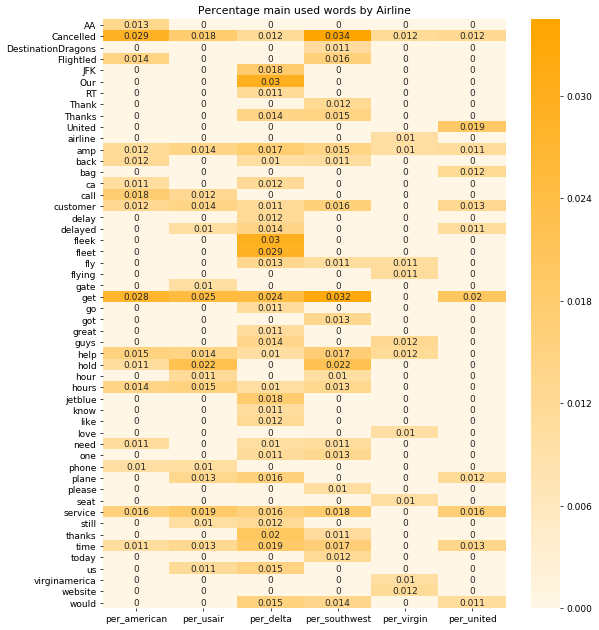

In [102]:
plt.figure(figsize=(10,12), dpi=65)
plt.title("Percentage main used words by Airline")
pal2 = sns.light_palette("orange", as_cmap=True)
sns.heatmap(comparative_airlines2, annot=True, cmap=pal2)

### 6.2 Are positive or negative comments about a particular airline happen around a certain season e.g. summer, winter, thanksgiving, Christmas, etc.? How would you analyze that?

<a\ id="B2"><a\>


#### Answer 6.2
The time range was too short to analyze the dataframe by season of the year. Even so, it was enough to analyze it behaviour by each day of the week. I've created a column that identify if the tweet was generated on Monday, Tuesday, Wednesday, Thursday, Friday, Saturday or Sunday. Later, I've generated the sentiment average by each day and each airline.

There is no a strong pattern if we analyze polarity(tweets sentiment) by day. Even so, we can see a slight discomfort (less polarity score) in Sundays compared with the rest of the week. It is interesting Thursdays for American Airlines which represent a very positive day. It's also important to mention that tweets are concentrated on Sunday, Monday and Tuesdays.


#### [Index](#index)

In [103]:
tuiter_time=tuiter2

In [104]:
tuiter_time.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'text2', 'text3', 'emoti', 'text4',
       'compound', 'neg', 'neu', 'pos', 'chosen', 'pred_sentiment',
       'pred_sentiment2', 'polarity'],
      dtype='object')

In [105]:
#Transforming a object column to date column (creating a new column)
tuiter_time["tweet_created2"]=pd.to_datetime(tuiter_time.tweet_created)

In [106]:
print("The earliest tweet is: ", min(tuiter_time.tweet_created2))
print("The latest tweet is: ", max(tuiter_time.tweet_created2))

The earliest tweet is:  2015-02-16 23:36:00
The latest tweet is:  2015-02-24 11:53:00


#### 6.2.1 Creating dummy variables by day

In [107]:
tuiter_time["day"]=tuiter_time.tweet_created2.dt.dayofweek
day = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',
       5:'Saturday',6:'Sunday'}
tuiter_time['day'] = tuiter2['day'].apply(lambda x: day[x])

In [108]:
tuiter_time

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,compound,neg,neu,pos,chosen,pred_sentiment,pred_sentiment2,polarity,tweet_created2,day
0,570306133677760000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,0.0000,0.000,1.000,0.000,1.000,neutral,neutral,0.0000,2015-02-24 11:35:00,Tuesday
1,570301130888122000,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,0.0000,0.000,1.000,0.000,1.000,neutral,neutral,0.0000,2015-02-24 11:15:00,Tuesday
2,570301083672813000,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,0.0000,0.000,1.000,0.000,1.000,neutral,neutral,0.0000,2015-02-24 11:15:00,Tuesday
3,570301031407624000,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,-0.5984,0.246,0.754,0.000,0.754,negative,verynegative,-0.5984,2015-02-24 11:15:00,Tuesday
4,570300817074462000,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,-0.5829,0.321,0.679,0.000,0.679,negative,verynegative,-0.5829,2015-02-24 11:14:00,Tuesday
5,570300767074181000,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,...,-0.5945,0.256,0.670,0.074,0.670,negative,verynegative,-0.5945,2015-02-24 11:14:00,Tuesday
6,570300616901320000,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,...,0.4019,0.000,0.891,0.109,0.891,positive,positive,0.4019,2015-02-24 11:13:00,Tuesday
7,570300248553349000,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,...,0.1458,0.160,0.643,0.197,0.643,positive,positive,0.1458,2015-02-24 11:12:00,Tuesday
8,570299953286942000,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,...,0.3382,0.000,0.715,0.285,0.715,positive,positive,0.3382,2015-02-24 11:11:00,Tuesday
9,570295459631263000,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,...,0.7717,0.000,0.642,0.358,0.642,positive,verypositive,0.7717,2015-02-24 10:53:00,Tuesday


#### 6.2.2 Creating table reports

In [109]:
tabla_dias_polarity=tuiter_time.pivot_table(index="airline", columns="day", 
                        values="polarity", aggfunc=np.mean)

semana=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", 
        "Saturday", "Sunday"]
tabla_dias_polarity=tabla_dias_polarity[semana]

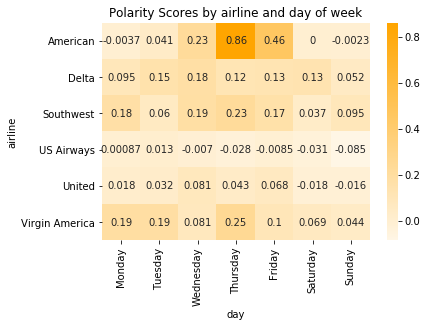

In [110]:
plt.title("Polarity Scores by airline and day of week")
confi_tabladias = sns.light_palette("orange", as_cmap=True)
sns.heatmap(tabla_dias_polarity, annot=True, cmap=confi_tabladias)

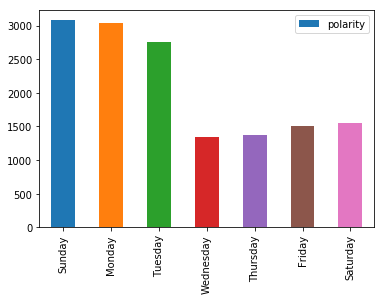

In [111]:
tabla_dias_polarity2=tuiter_time.pivot_table(index="day", 
                        values="polarity", aggfunc=len)
tabla_dias_polarity2= pd.DataFrame(tabla_dias_polarity2, 
                                   index=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 
                                          'Thursday', 'Friday', "Saturday"])
tabla_dias_polarity2.plot.bar(x=tabla_dias_polarity2.index.values, y="polarity")

### 6.3 Are there active customers who are tweeting and retweeting more frequently?
<a\ id="B3"><a\>


#### Answer 6.3
I've analyzed the tables considering those id's (customers) who appears more than once in the database. I'm assuming those are people retweeting.

In section 6.3.1.3 (last tables) we can see: 

1) The database shows retuits just for American.

2) There is a pattern. When the tweet is positive, the retuit tend to be more positive. On the contrary, when the tweet is negative the retweet tend to be even more negative.

#### [Index](#index)

In [112]:
print("The dimensions of the dataframe are: ", tuiter2.shape)
print("The number of ids in dataframe are: ", len(tuiter2.tweet_id))
print("The number of unique ids in dataframe are: ", len(np.unique(tuiter2.tweet_id)))

The dimensions of the dataframe are:  (14640, 29)
The number of ids in dataframe are:  14640
The number of unique ids in dataframe are:  14485


### 6.3.1 Analysis based in repeated ids

#### 6.3.1.1 Table of people who retuits (based in duplicated ids)

In [113]:
duplicados=tuiter2.pivot_table(index="tweet_id", 
                                    values="airline", aggfunc=len)
duplicados=duplicados[duplicados.airline>1]
duplicados.head()

,airline
tweet_id,
569600137296633000,2
569601363799359000,2
569621879633391000,2
569622568459636000,2
569680231012773000,2


#### 6.3.1.2 Detail of people who retuits

In [114]:
#List of people who retuits more
aux_duplicados=tuiter2.tweet_id.duplicated() #Boolean Vector of duplicados
detalles_duplicados=tuiter2[aux_duplicados] #Applying boolean to dataframe
print("The number of tweet id's that retweet are: ", len(duplicados))
detalles_duplicados.head()

The number of tweet id's that retweet are:  155


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,compound,neg,neu,pos,chosen,pred_sentiment,pred_sentiment2,polarity,tweet_created2,day
12040,570308309682675000,negative,1.0000,Customer Service Issue,1.0000,American,NaN,SweeLoTmac,NaN,0,...,-0.6908,0.251,0.749,0.000,0.749,negative,verynegative,-0.6908,2015-02-24 11:44:00,Tuesday
12041,570308064185880000,neutral,0.6755,NaN,0.0000,American,NaN,LancasterPattie,NaN,0,...,0.0000,0.000,1.000,0.000,1.000,neutral,neutral,0.0000,2015-02-24 11:43:00,Tuesday
12042,570307949614256000,negative,1.0000,Can't Tell,1.0000,American,NaN,ELLLORRAC,NaN,0,...,0.4404,0.000,0.828,0.172,0.828,positive,positive,0.4404,2015-02-24 11:43:00,Tuesday
12043,570307948171423000,negative,1.0000,Can't Tell,0.6758,American,NaN,SweeLoTmac,NaN,0,...,0.4468,0.122,0.678,0.199,0.678,positive,positive,0.4468,2015-02-24 11:43:00,Tuesday
12044,570307434113310000,negative,1.0000,Late Flight,1.0000,American,NaN,LauraMolito,NaN,0,...,0.0173,0.188,0.622,0.190,0.622,positive,positive,0.0173,2015-02-24 11:41:00,Tuesday


In [115]:
repetido_example=tuiter2.loc[tuiter2["tweet_id"]==569600137296633000] #Original database
detalles_duplicados.loc[detalles_duplicados["tweet_id"]==569600137296633000]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,compound,neg,neu,pos,chosen,pred_sentiment,pred_sentiment2,polarity,tweet_created2,day
14556,569600137296633000,positive,1.0,NaN,NaN,American,NaN,douglaskgordon,NaN,0,...,0.4738,0.0,0.619,0.381,0.619,positive,positive,0.4738,2015-02-22 12:50:00,Sunday


#### 6.3.1.3 Comparative table of sentiment from people who retweet

In [116]:
table_retuiter1=detalles_duplicados.pivot_table(index="airline", columns="day",
                                values="polarity", aggfunc=np.mean)

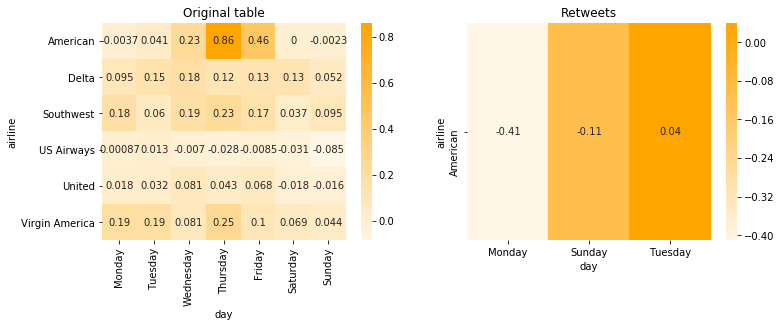

In [117]:
plt.figure(figsize=(12,4))

#Original table
plt.subplot(121) #number rows, number columns, position
plt.title("Original table")
confi_tabladias = sns.light_palette("orange", as_cmap=True)
sns.heatmap(tabla_dias_polarity, annot=True, cmap=confi_tabladias)

#Table when people retuits
plt.subplot(122)
plt.title("Retweets")
confi_tabladias = sns.light_palette("orange", as_cmap=True)
sns.heatmap(table_retuiter1, annot=True, cmap=confi_tabladias)
